In [1]:
import pandas as pd
df = pd.read_csv ("time_series_sensors.csv ", parse_dates =['timestamp'])
df.set_index ('timestamp', inplace = True )
print (df.head ())
print (df.describe ())

                     temperature   humidity  vibration
timestamp                                             
2024-01-01 00:00:00    25.248357  68.459150   0.529534
2024-01-01 00:01:00    24.941776  72.286707   0.429551
2024-01-01 00:02:00    25.345661  70.369651   0.541204
2024-01-01 00:03:00    25.794239  70.504241   0.515158
2024-01-01 00:04:00    24.926555  66.059118   0.468237
       temperature     humidity    vibration
count  8611.000000  8611.000000  8641.000000
mean     24.999260    60.021153     0.499811
std       2.174162     7.342531     0.049506
min      20.082941    44.312937     0.307181
25%      22.961921    53.251348     0.465930
50%      24.986913    60.101659     0.499935
75%      27.037578    66.836210     0.533559
max      29.497574    77.600185     0.697117


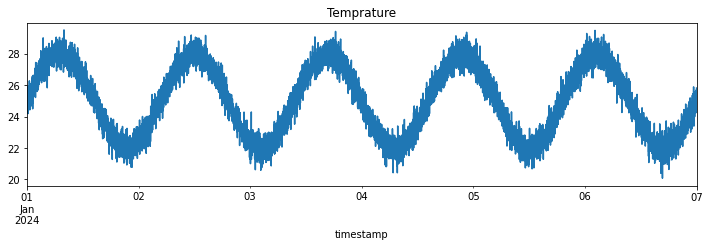

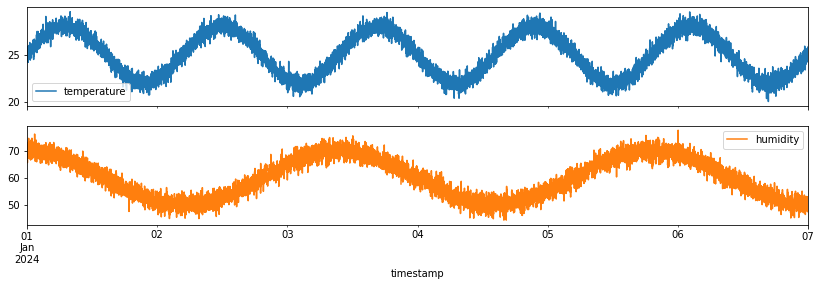

In [10]:
import matplotlib . pyplot as plt
df['temperature'].plot(figsize =(12 ,3),title ="Temprature")
plt.show ()
df[['temperature','humidity']].plot(subplots = True,figsize =(14 ,4))
plt.show ()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


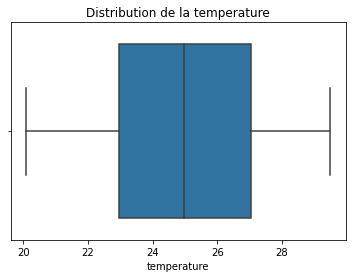

In [3]:
import seaborn as sns
sns.boxplot ( x = df ['temperature'])
plt.title ("Distribution de la temperature")
plt.show ()

In [4]:
print (" Valeurs manquantes:", df.isnull ().sum () )

# Interpolation linaire
df_interpolated = df.interpolate ( method ='linear')

 Valeurs manquantes: temperature    30
humidity       30
vibration       0
dtype: int64


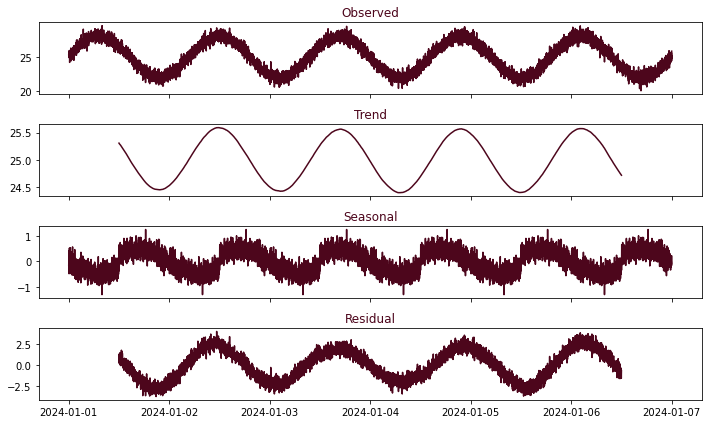

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['temperature'] = df['temperature'].interpolate(method='time')  # works if your index is datetime
result = seasonal_decompose ( df['temperature'] , model ='additive', period=1440) # 1440 min = 1 jour
# Plot manually with dark cherry color
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
axes[0].plot(result.observed, color='#4d061c')
axes[0].set_title('Observed', color='#4d061c')

axes[1].plot(result.trend, color='#4d061c')
axes[1].set_title('Trend', color='#4d061c')

axes[2].plot(result.seasonal, color='#4d061c')
axes[2].set_title('Seasonal', color='#4d061c')

axes[3].plot(result.resid, color='#4d061c')
axes[3].set_title('Residual', color='#4d061c')
plt.tight_layout()
plt.show()

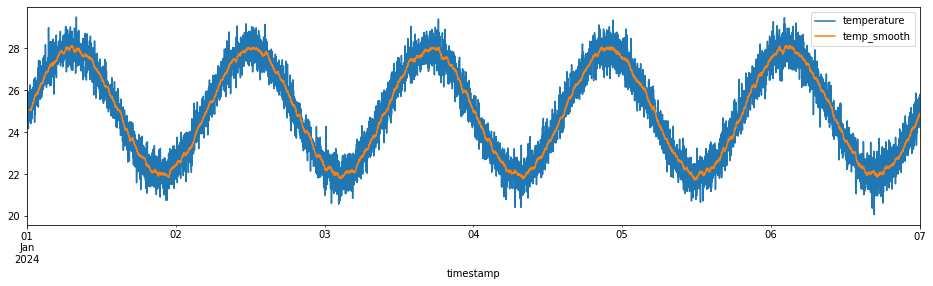

In [6]:
df ['temp_smooth'] = df ['temperature'].rolling ( window =30).mean ()
df [['temperature','temp_smooth']]. plot ( figsize =(16 ,4) )
plt.show ()

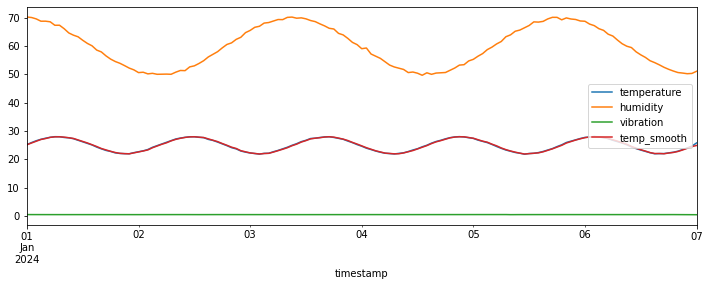

In [7]:
df_hourly = df.resample ('H').mean ()
df_hourly.plot ( figsize =(12,4) )
plt.show ()